PayGuard – Using Business Analytics Tools to Detect Transaction Fraud

PayGuard processes thousands of online transactions every day. Recently, they’ve seen a spike in fraud, but they lack a system to automatically flag suspicious transactions. You’re hired to use business analytics tools to build an early warning model, visualize key trends, and propose a scoring strategy to help analysts prioritize cases.

 SECTION 1: Simulate Transactions Dataset

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 5000

data = pd.DataFrame({
    'transaction_id': range(1, n+1),
    'amount': np.random.exponential(scale=200, size=n).round(2),
    'device_trust_score': np.random.uniform(0, 1, size=n),
    'location_distance_km': np.random.exponential(scale=50, size=n),
    'repeat_customer': np.random.choice([0, 1], size=n, p=[0.6, 0.4]),
    'hour_of_day': np.random.randint(0, 24, size=n),
    'previous_fraud': np.random.choice([0, 1], size=n, p=[0.9, 0.1])
})

# Simulate fraud label (target)
fraud_prob = (
    0.05 +
    0.2 * (data['amount'] > 500) +
    0.3 * (data['device_trust_score'] < 0.2) +
    0.2 * (data['location_distance_km'] > 100) +
    0.15 * (data['repeat_customer'] == 0) +
    0.3 * data['previous_fraud']
)
data['fraud'] = np.random.binomial(1, fraud_prob.clip(0, 0.95))
data.head()


,transaction_id,amount,device_trust_score,location_distance_km,repeat_customer,hour_of_day,previous_fraud,fraud
0,1,93.85,0.393636,23.391565,0,21,0,0
1,2,602.02,0.473436,20.241673,1,1,0,0
2,3,263.35,0.854547,9.688578,0,3,0,1
3,4,182.59,0.340004,46.731222,0,12,0,0
4,5,33.92,0.869650,32.372773,0,12,0,0


SECTION 2: Data Wrangling & Feature Engineering

In [ ]:
# Feature creation: night transaction
data['night_transaction'] = data['hour_of_day'].apply(lambda x: 1 if x < 6 or x > 22 else 0)

# Drop unneeded column
data_model = data.drop(columns=['transaction_id', 'hour_of_day'])


SECTION 3: Descriptive Analytics & Visualization

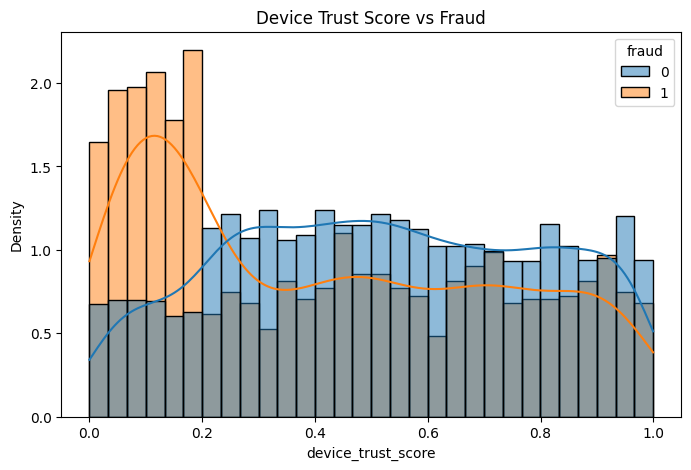

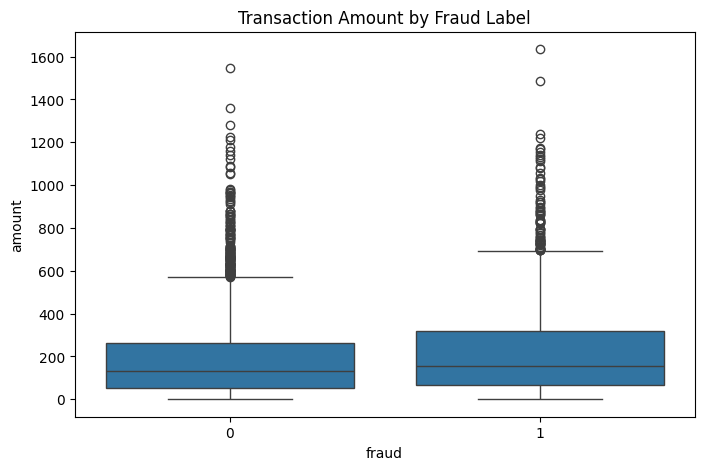

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fraud rate by device trust
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='device_trust_score', hue='fraud', bins=30, kde=True, stat="density", common_norm=False)
plt.title('Device Trust Score vs Fraud')
plt.show()

# Fraud by time of day
plt.figure(figsize=(8, 5))
sns.boxplot(x='fraud', y='amount', data=data)
plt.title('Transaction Amount by Fraud Label')
plt.show()


SECTION 4: Predictive Analytics (Modeling)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

X = data_model.drop(columns='fraud')
y = data_model['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluation
print("Logistic Regression AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print("Decision Tree AUC:", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))


Logistic Regression AUC: 0.72213931803995
Decision Tree AUC: 0.7570297869850187


SECTION 5: Prescriptive Analytics – Flag High-Risk Transactions

In [ ]:
# Use decision tree probability to score
data['fraud_risk_score'] = tree.predict_proba(X)[:, 1]

# Rank top 5% riskiest transactions
data['flag_for_review'] = (data['fraud_risk_score'] > data['fraud_risk_score'].quantile(0.95)).astype(int)

print("Number of transactions flagged:", data['flag_for_review'].sum())


Number of transactions flagged: 241


SECTION 6: Dashboard-Style Communication (Optional with Plotly/Seaborn)

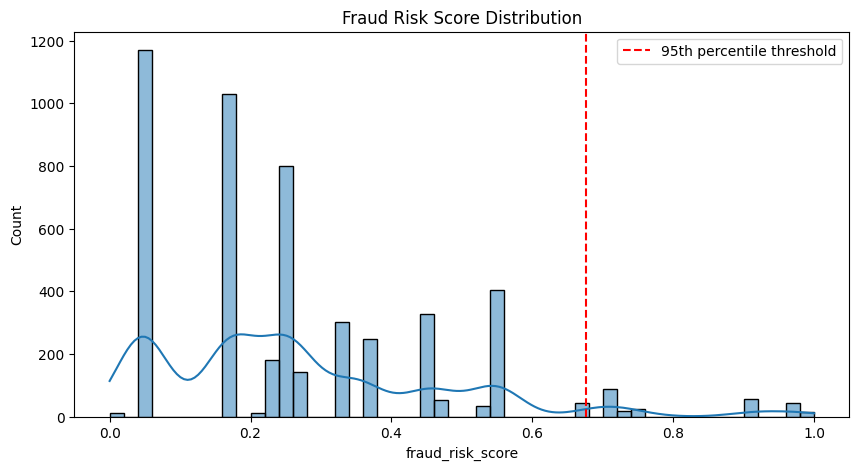

In [ ]:
# Distribution of fraud risk scores
plt.figure(figsize=(10, 5))
sns.histplot(data['fraud_risk_score'], bins=50, kde=True)
plt.axvline(data['fraud_risk_score'].quantile(0.95), color='red', linestyle='--', label='95th percentile threshold')
plt.title('Fraud Risk Score Distribution')
plt.legend()
plt.show()


## Review Questions

1. **What is the main focus of the analysis in this notebook?**

   A. Maximizing predictive accuracy  
   B. Making decisions under uncertainty using modeled outcomes  
   C. Cleaning and merging raw datasets  
   D. Training complex machine learning models  

2. **What does uncertainty represent in the results shown in this notebook?**

   A. Errors caused by bugs in the code  
   B. Random noise that should be ignored  
   C. Variability in outcomes due to assumptions and randomness  
   D. Missing values in the dataset  

3. **Why are ranges, distributions, or multiple simulated outcomes shown instead of a single number?**

   A. To make the results harder to interpret  
   B. To reflect that outcomes are not known with certainty  
   C. To increase computational complexity  
   D. To avoid choosing a final answer  

4. **What tradeoff is most clearly illustrated by the scenarios evaluated in the notebook?**

   A. Speed versus memory usage  
   B. Bias versus variance in a model  
   C. Potential benefit versus potential risk  
   D. Visualization quality versus computation time  

5. **How should the results from this notebook be used?**

   A. As a guarantee of real-world outcomes  
   B. As exact predictions for individuals  
   C. As decision-support information that includes uncertainty  
   D. As purely descriptive summaries with no assumptions  

